In [1]:
import sys
import os
from torch.utils.data import DataLoader
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
from datasets.Waymo import WaymoDataset, waymo_collate_fn
from visualize import render_observed_scene_state_current_timestep, render_observed_scene_state, render_flow_field

In [2]:
tfrecord_path = '../../data1/waymo_dataset/v1.1/waymo_open_dataset_motion_v_1_1_0/uncompressed/tf_example/validation'
idx_path = '../../data1/waymo_dataset/v1.1/idx/validation'
dataset = WaymoDataset(tfrecord_path, idx_path)
dataloader = DataLoader(dataset, batch_size=1, collate_fn=waymo_collate_fn)
road_map, agent_trajectories, unobserved_positions, future_times, target_velocity, agent_mask, flow_field_mask = next(iter(dataloader))

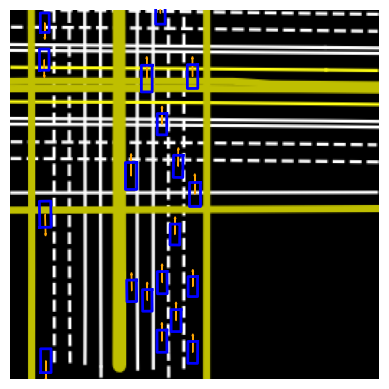

In [3]:
render_observed_scene_state_current_timestep(road_map[0], agent_trajectories[0])

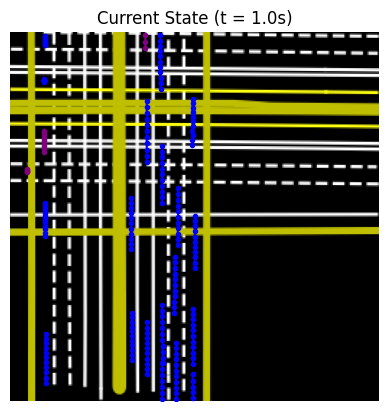

In [4]:
render_observed_scene_state(road_map[0], agent_trajectories[0])

In [5]:
from IPython.display import HTML
anim = render_flow_field(road_map[0], future_times[0], unobserved_positions[0], target_velocity[0])
HTML(anim.to_jshtml())